In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Mounted at /content/drive
Device: cpu


In [ ]:
DF_LOG_PATH = "/content/drive/MyDrive/llm model/nga_west2_log.csv"
df = pd.read_csv(DF_LOG_PATH)

print("Loaded df shape:", df.shape)
print("Columns:", df.columns.tolist())


Loaded df shape: (21089, 35)
Columns: ['ssn', 'eqid', 'pga', 'T0.010S', 'T0.020S', 'T0.030S', 'T0.040S', 'T0.050S', 'T0.060S', 'T0.070S', 'T0.080S', 'T0.090S', 'T0.150S', 'T0.200S', 'T0.300S', 'T0.500S', 'T0.600S', 'T0.700S', 'T0.800S', 'T0.900S', 'T1.000S', 'T1.200S', 'T1.500S', 'T2.000S', 'T3.000S', 'T4.000S', 'eqm', 'hyp', 'dist', 'vs30', 'ftype', 'log_dist', 'log_vs30', 'dir', 'eqid_cat']


In [ ]:
df.head(50)

ssn  eqid       pga   T0.010S   T0.020S   T0.030S   T0.040S   T0.050S  \
0   198     0 -3.069960 -3.046613 -3.012493 -2.891416 -2.684590 -2.553883   
1   133     1 -3.195135 -3.194256 -3.189699 -3.181805 -3.177155 -3.145304   
2    75     2 -3.992745 -3.991964 -3.974570 -3.930486 -3.805966 -3.717121   
3    75     6 -3.527986 -3.526668 -3.522734 -3.513310 -3.498539 -3.488019   
4    75    10 -3.577982 -3.576791 -3.570267 -3.557557 -3.525890 -3.471607   
5    75    12 -3.118126 -3.116303 -3.091504 -3.081059 -2.936133 -2.971873   
6   147    17 -4.356827 -4.341404 -4.352240 -4.336536 -4.294919 -4.262773   
7   135    18 -4.181472 -4.181348 -4.180882 -4.177607 -4.162766 -4.148427   
8    81    19 -4.708932 -4.708739 -4.708016 -4.704683 -4.694489 -4.683820   
9   499    19 -4.797772 -4.797570 -4.796448 -4.795214 -4.784532 -4.756168   
10   90    19 -3.169990 -3.169219 -3.163983 -3.153731 -3.120455 -3.049669   
11  323    20 -3.904601 -3.902398 -3.882724 -3.866151 -3.776337 -3.723652   
12   74    20 -3.583907 -3.582035 -3.576625 -3.548604 -3.523554 -3.483514   
13  326    20 -3.994318 -3.991716 -3.975994 -3.968853 -3.905880 -3.796742   
14  320    20 -4.681760 -4.681050 -4.676283 -4.640108 -4.598820 -4.594652   
15   87    20 -3.999489 -3.993931 -3.981884 -3.925938 -3.902021 -3.897523   
16   68    20 -3.283494 -3.277949 -3.210741 -3.038318 -3.055567 -2.867295   
17   67    21 -3.370193 -3.352915 -3.359043 -3.288872 -3.317699 -3.358331   
18  124    21 -4.969517 -4.969398 -4.967841 -4.963510 -4.958461 -4.929140   
19   69    21 -4.707956 -4.707031 -4.703202 -4.630731 -4.614473 -4.521571   
20    2    21 -4.422932 -4.422038 -4.415411 -4.403930 -4.383918 -4.364908   
21   73    21 -3.604465 -3.602602 -3.594743 -3.584194 -3.535378 -3.483078   
22  125    21 -5.438776 -5.437749 -5.424426 -5.380633 -5.133416 -5.281931   
23  129    21 -5.173501 -5.172187 -5.167612 -5.154697 -5.117164 -5.101508   
24  122    21 -3.729993 -3.728794 -3.706300 -3.651239 -3.613581 -3.578245   
25  272    21 -3.305033 -3.287927 -3.288586 -3.208199 -3.185334 -3.133365   
26  137    21 -4.738016 -4.736725 -4.731917 -4.723061 -4.713143 -4.691558   
27  138    21 -4.627242 -4.624649 -4.617314 -4.607270 -4.594026 -4.522721   
28  139    21 -4.523406 -4.522461 -4.516850 -4.497814 -4.478757 -4.447471   
29  140    21 -4.712110 -4.709829 -4.701164 -4.685867 -4.648817 -4.504497   
30  100    21 -5.271559 -5.270934 -5.256420 -5.225155 -5.212669 -5.143744   
31   90    21 -4.222087 -4.219753 -4.215373 -4.206851 -4.171344 -4.117497   
32  134    21 -3.235564 -3.214908 -3.134569 -2.990236 -2.759836 -2.773637   
33  149    21 -3.574908 -3.572285 -3.556121 -3.510832 -3.389886 -3.236486   
34  158    23 -3.503596 -3.500081 -3.487688 -3.459743 -3.411917 -3.180151   
35  168    24 -3.556694 -3.551496 -3.534832 -3.500923 -3.417244 -3.283302   
36  169    24 -3.392664 -3.383614 -3.360634 -3.323247 -3.203664 -2.961576   
37  167    25 -2.752927 -2.751888 -2.732288 -2.691749 -2.638714 -2.401741   
38  168    25 -3.747611 -3.739267 -3.729757 -3.679928 -3.368201 -3.148643   
39  250    26 -3.523636 -3.515036 -3.471957 -3.268161 -3.086580 -2.912912   
40  253    26 -3.333922 -3.323459 -3.278494 -3.227384 -3.113776 -2.790148   
41  257    27 -3.080942 -3.078226 -3.070893 -3.051004 -2.997467 -2.905271   
42  251    28 -3.713131 -3.711624 -3.687186 -3.654444 -3.631957 -3.598998   
43   60    30 -3.610105 -3.600636 -3.596947 -3.577326 -3.594220 -3.521755   
44  448    31 -3.231936 -3.231311 -3.224227 -3.216787 -3.201609 -3.202496   
45  609    32 -3.575765 -3.569261 -3.536784 -3.490515 -3.395578 -3.127946   
46  933    32 -3.171110 -3.161458 -3.078195 -2.991954 -2.647538 -2.507759   
47  216    34 -2.940657 -2.939742 -2.929608 -2.888473 -2.814424 -2.777541   
48  212    34 -2.889069 -2.887249 -2.868430 -2.858681 -2.707487 -2.611987   
49  103    34 -2.946352 -2.941929 -2.874539 -2.818473 -2.507573 -2.145146   

     T0.060S   T0.070S  ...   T4.000S       eqm       hyp      dist    vs30 

In [ ]:
filtered_row = df[(df['ssn'] == 75) & (df['eqid_cat'] == 10)]
display(filtered_row)

# eqid_cat is EQID
# SSN is station sequence number
# use unnamed column for idx set up

ssn  eqid       pga   T0.010S   T0.020S  T0.030S   T0.040S   T0.050S  \
3      75     6 -3.527986 -3.526668 -3.522734 -3.51331 -3.498539 -3.488019   
9920   75     6 -4.390220 -4.378231 -4.302168 -4.24836 -3.961137 -3.899054   

       T0.060S   T0.070S  ...   T4.000S       eqm       hyp      dist    vs30  \
3    -3.440999 -3.401253  ... -5.587116  0.380193 -0.140107 -1.199059  213.44   
9920 -3.739508 -3.339937  ... -7.508730  0.380193 -0.140107 -1.199059  213.44   

      ftype  log_dist  log_vs30  dir  eqid_cat  
3         0 -1.667268 -1.972055    0        10  
9920      0 -1.667268 -1.972055    1        10  

[2 rows x 35 columns]

In [ ]:
required_cols = [
    "eqm","ftype","hyp","dist","log_dist","log_vs30","dir","eqid",
    "pga",
    "T0.010S","T0.020S","T0.030S","T0.040S","T0.050S",
    "T0.060S","T0.070S","T0.080S","T0.090S",
    "T0.150S","T0.200S","T0.300S",
    "T0.500S","T0.600S","T0.700S","T0.800S","T0.900S",
    "T1.000S","T1.200S","T1.500S","T2.000S","T3.000S","T4.000S"
]

missing = [c for c in required_cols if c not in df.columns]
assert len(missing) == 0, f"Missing columns: {missing}"


In [ ]:
BUNDLE_PATH = "/content/drive/MyDrive/llm model/model/stt_gmm_weights.pt"

bundle = torch.load(
    BUNDLE_PATH,
    map_location=device,
    weights_only=True
)

# Load OUTPUT normalization stats from bundle (authoritative)
mu_T = bundle["mu_T"].cpu().numpy()
std_T = bundle["std_T"].cpu().numpy()

print("Loaded output mu_T shape:", mu_T.shape)
print("Loaded output std_T shape:", std_T.shape)

print("Bundle keys:", bundle.keys())

model_config = bundle["model_config"]
num_events = bundle["num_events"]
periods = bundle["periods"].cpu().numpy()

print("Periods:", periods)


Loaded output mu_T shape: (24,)
Loaded output std_T shape: (24,)
Bundle keys: dict_keys(['model_state', 'context_state', 'model_config', 'num_events', 'mu_T', 'std_T', 'periods', 'event_id_map'])
Periods: [1.0e-06 1.0e-02 2.0e-02 3.0e-02 4.0e-02 5.0e-02 6.0e-02 7.0e-02 8.0e-02
 9.0e-02 1.5e-01 2.0e-01 3.0e-01 5.0e-01 6.0e-01 7.0e-01 8.0e-01 9.0e-01
 1.0e+00 1.2e+00 1.5e+00 2.0e+00 3.0e+00 4.0e+00]


In [ ]:
from torch import nn

class ContextEncoder(nn.Module):
    def __init__(self,
                 num_continuous=5,
                 ftype_vocab_size=5,
                 dir_vocab_size=2,
                 num_events=None,
                 cont_emb_dim=32,
                 ftype_emb_dim=8,
                 dir_emb_dim=4,
                 context_dim=64):
        super().__init__()

        self.cont_proj = nn.Sequential(
            nn.Linear(num_continuous, cont_emb_dim),
            nn.ReLU(),
            nn.Linear(cont_emb_dim, cont_emb_dim)
        )

        self.ftype_emb = nn.Embedding(ftype_vocab_size, ftype_emb_dim)
        self.dir_emb   = nn.Embedding(dir_vocab_size, dir_emb_dim)
        self.event_emb = nn.Embedding(num_events, context_dim)

        fusion_dim = cont_emb_dim + ftype_emb_dim + dir_emb_dim
        self.fusion = nn.Sequential(
            nn.Linear(fusion_dim, context_dim),
            nn.ReLU(),
            nn.Linear(context_dim, context_dim)
        )

    def forward(self, x_cont, x_ftype, x_dir, event_id):
        cont = self.cont_proj(x_cont)
        ftype = self.ftype_emb(x_ftype)
        direc = self.dir_emb(x_dir)
        fused = torch.cat([cont, ftype, direc], dim=-1)
        return self.fusion(fused) + self.event_emb(event_id)


class TransformerBlock(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super().__init__()
        self.attn = nn.MultiheadAttention(
            d_model, n_heads, dropout=dropout, batch_first=True
        )
        self.ff = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model)
        )
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.drop = nn.Dropout(dropout)

    def forward(self, x):
        attn, _ = self.attn(x, x, x)
        x = self.norm1(x + self.drop(attn))
        ff = self.ff(x)
        return self.norm2(x + self.drop(ff))


class SpectralTokenTransformer(nn.Module):
    def __init__(self,
                 token_dim=1,
                 context_dim=64,
                 d_model=64,
                 n_layers=4,
                 n_heads=4,
                 d_ff=256,
                 dropout=0.1):
        super().__init__()
        self.token_embed = nn.Linear(token_dim, d_model)
        self.context_proj = nn.Linear(context_dim, d_model)
        self.blocks = nn.ModuleList([
            TransformerBlock(d_model, n_heads, d_ff, dropout)
            for _ in range(n_layers)
        ])
        self.output_head = nn.Linear(d_model, 1)

    def forward(self, tokens, context):
        x = self.token_embed(tokens)
        x = x + self.context_proj(context).unsqueeze(1)
        for blk in self.blocks:
            x = blk(x)
        return self.output_head(x).squeeze(-1)


In [ ]:
model = SpectralTokenTransformer(**model_config).to(device)
context_encoder = ContextEncoder(num_events=num_events).to(device)

model.load_state_dict(bundle["model_state"])
context_encoder.load_state_dict(bundle["context_state"])

model.eval()
context_encoder.eval()

print("Model loaded successfully.")


Model loaded successfully.


In [ ]:
# idx = np.random.randint(len(df))
idx = 3
row = df.iloc[idx]

print("Using idx:", idx)
print("eqid:", row["eqid"])


Using idx: 3
eqid: 6.0


In [ ]:
row

ssn          75.000000
eqid          6.000000
pga          -3.527986
T0.010S      -3.526668
T0.020S      -3.522734
T0.030S      -3.513310
T0.040S      -3.498539
T0.050S      -3.488019
T0.060S      -3.440999
T0.070S      -3.401253
T0.080S      -3.264491
T0.090S      -3.171961
T0.150S      -2.637892
T0.200S      -2.756275
T0.300S      -2.613032
T0.500S      -2.277989
T0.600S      -2.447413
T0.700S      -2.700568
T0.800S      -2.833314
T0.900S      -3.090334
T1.000S      -3.251290
T1.200S      -3.545680
T1.500S      -3.824662
T2.000S      -4.040690
T3.000S      -4.970650
T4.000S      -5.587116
eqm           0.380193
hyp          -0.140107
dist         -1.199059
vs30        213.440000
ftype         0.000000
log_dist     -1.667268
log_vs30     -1.972055
dir           0.000000
eqid_cat     10.000000
Name: 3, dtype: float64

In [ ]:
sa_cols = [
    "pga",
    "T0.010S","T0.020S","T0.030S","T0.040S","T0.050S",
    "T0.060S","T0.070S","T0.080S","T0.090S",
    "T0.150S","T0.200S","T0.300S",
    "T0.500S","T0.600S","T0.700S","T0.800S","T0.900S",
    "T1.000S","T1.200S","T1.500S","T2.000S","T3.000S","T4.000S"
]

true_log_sa = row[sa_cols].values.astype(float)

print("True log-SA range:", true_log_sa.min(), true_log_sa.max())


True log-SA range: -5.587116061924551 -2.2779890704244377


In [ ]:
@torch.no_grad()
def predict_log_sa(row):
    x_cont = torch.tensor(
        [[row["eqm"], row["hyp"], row["dist"],
          row["log_dist"], row["log_vs30"]]],
        dtype=torch.float32, device=device
    )
    x_ftype = torch.tensor([int(row["ftype"])], device=device)
    x_dir   = torch.tensor([int(row["dir"])], device=device)
    event_id = torch.tensor([int(row["eqid"])], device=device)

    context = context_encoder(x_cont, x_ftype, x_dir, event_id)

    logT = torch.log(torch.tensor(periods, device=device))
    tokens = logT.unsqueeze(0).unsqueeze(-1)

    pred_norm = model(tokens, context)[0].cpu().numpy()
    pred_log_sa = pred_norm * std_T + mu_T
    return pred_norm, pred_log_sa


In [ ]:
pred_norm, pred_log_sa = predict_log_sa(row)

print("Pred log-SA range:", pred_log_sa.min(), pred_log_sa.max())


Pred log-SA range: -6.2674866 -2.6405373


In [ ]:
true_sa = np.exp(true_log_sa)
pred_sa = np.exp(pred_log_sa)


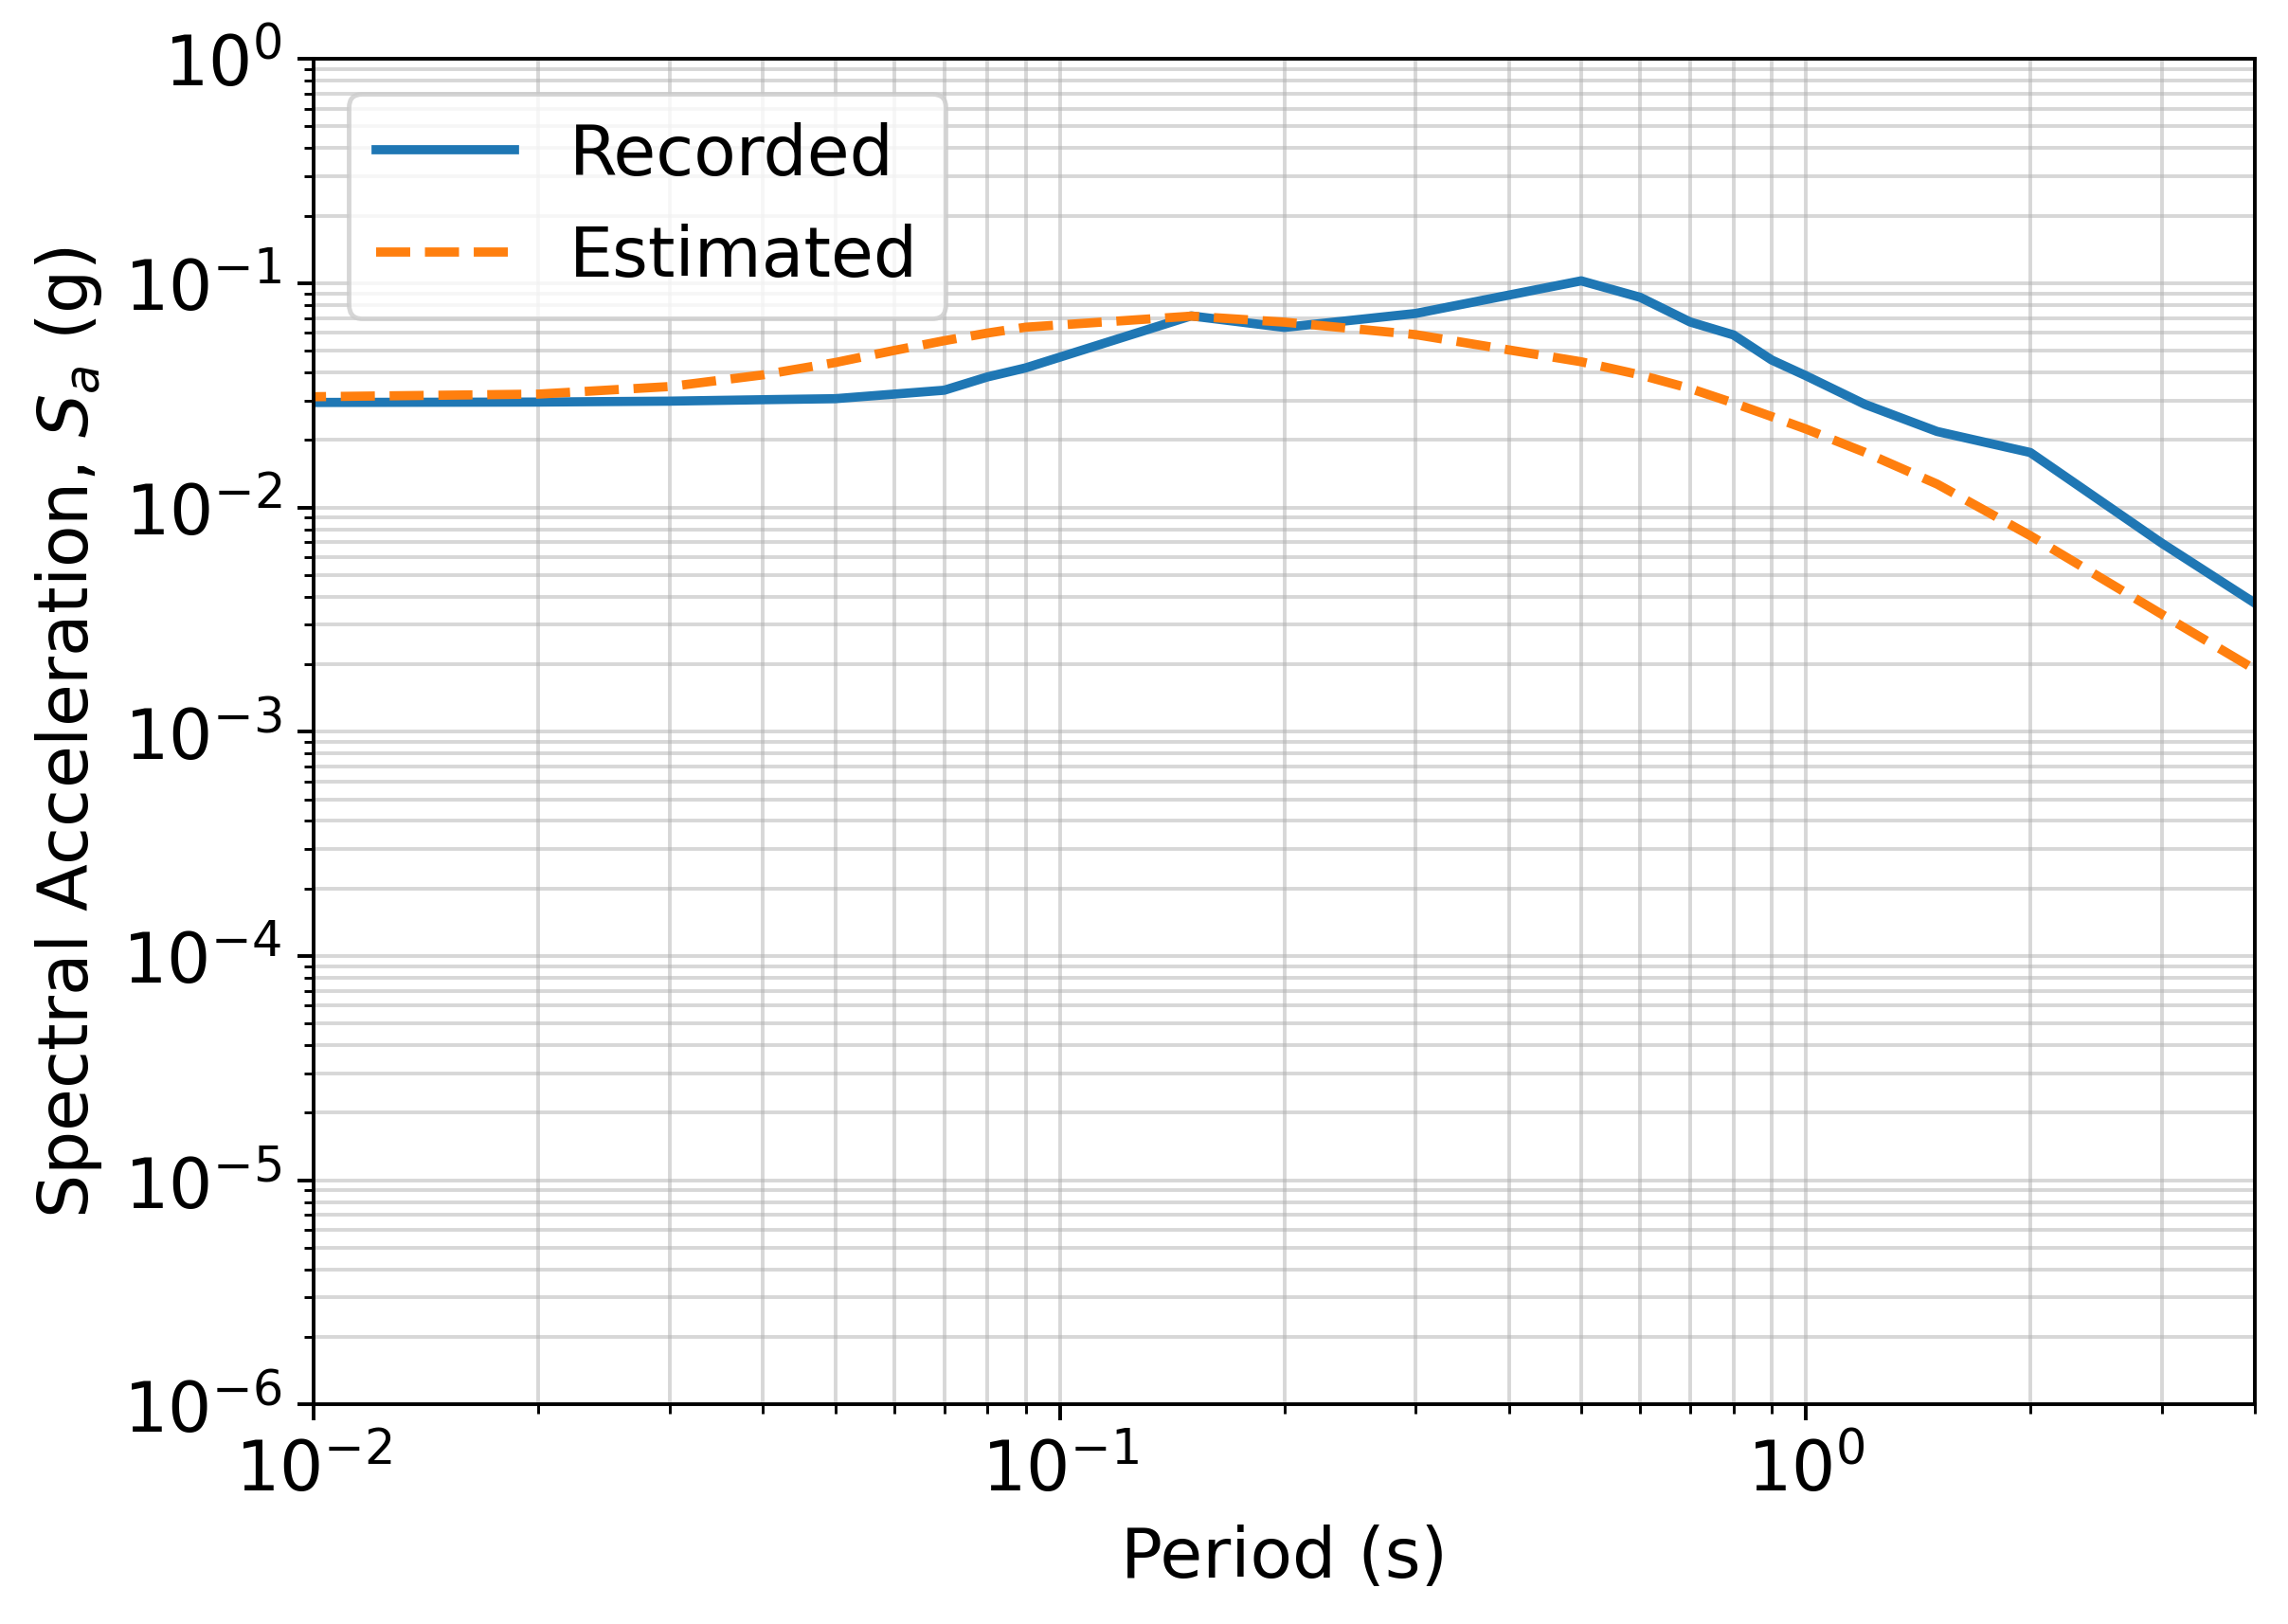

In [ ]:
plt.figure(figsize=(7,5),dpi=350)

fontsize=15

plt.loglog(periods, true_sa, lw=2, label="Recorded")
plt.loglog(periods, pred_sa, "--", lw=2, label="Estimated")

plt.xlabel("Period (s)",fontsize=fontsize)
plt.ylabel("Spectral Acceleration, $S_a$ (g)",fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlim(0.01, periods.max())
plt.ylim(1e-6, 1e0)

plt.grid(True, which="both", alpha=0.5)
plt.legend(fontsize=fontsize)
plt.tight_layout()
plt.show()


# Scatter plot

Running predictions on training and validation sets...


/tmp/ipython-input-1549892897.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=20)
/tmp/ipython-input-1549892897.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=20)
/tmp/ipython-input-1549892897.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=20)
/tmp/ipython-input-1549892897.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=20)
/tmp/ipython-input-1549892897.py:104: UserWarning: No artists with l

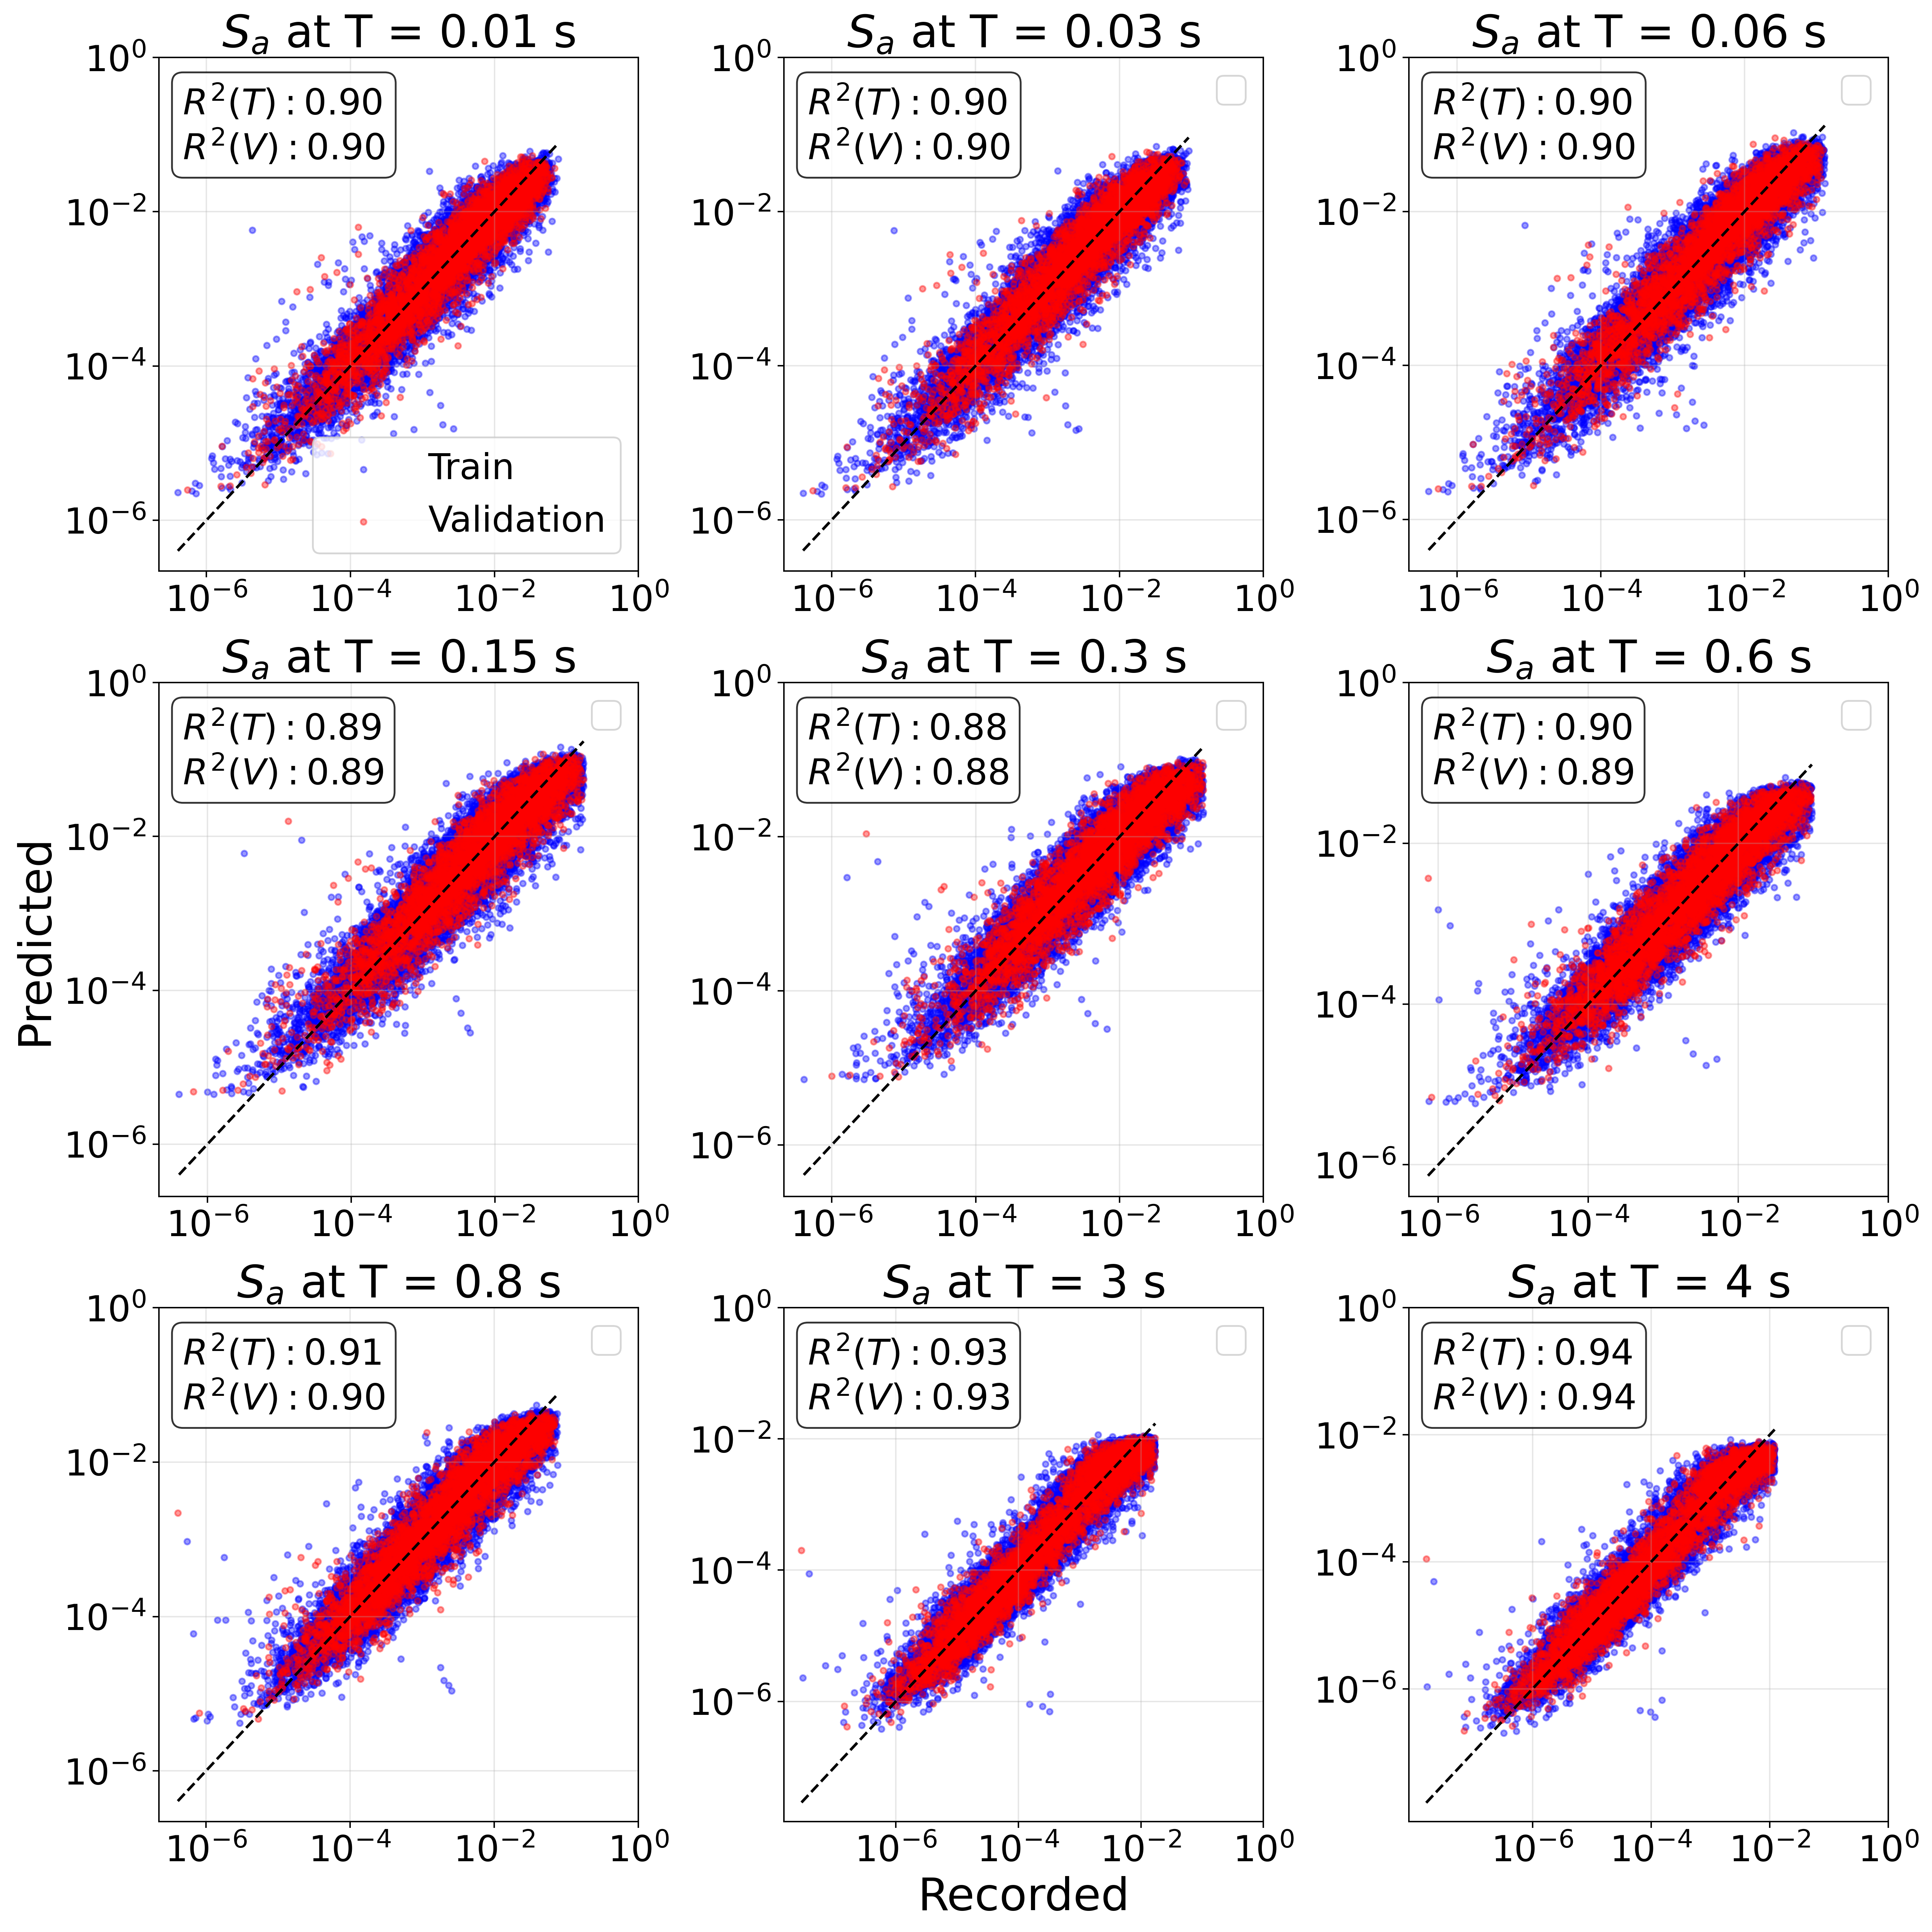

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# --- 1. Setup and Data Loading ---
# (Assumes df, model, and context_encoder are already initialized as per your script)
# Splitting indices for "name sake" as requested (80/20 split)
train_df, val_df = train_test_split(df, test_size=0.20, random_state=42)

# Specific periods to plot (as indices or column names)
plot_periods = ["T0.010S", "T0.030S", "T0.060S", "T0.150S", "T0.300S", "T0.600S", "T0.800S", "T3.000S", "T4.000S"]
titles = ["0.01 s", "0.03 s", "0.06 s", "0.15 s", "0.3 s", "0.6 s", "0.8 s", "3 s", "4 s"]

# Define custom tick locations and labels
tick_locations = np.log([1e-6, 1e-4, 1e-2, 1e0])
tick_labels = [r"$10^{-6}$",r"$10^{-4}$",r"$10^{-2}$", r"$10^{0}$", ]

# --- 2. Bulk Prediction Function ---
@torch.no_grad()
def get_predictions(dataframe):
    """Predicts log-SA for an entire dataframe."""
    all_preds = []
    all_trues = []

    for _, row in dataframe.iterrows():
        # Prepare inputs [cite: 12]
        x_cont = torch.tensor([[row["eqm"], row["hyp"], row["dist"], row["log_dist"], row["log_vs30"]]],
                              dtype=torch.float32, device=device)
        x_ftype = torch.tensor([int(row["ftype"])], device=device)
        x_dir   = torch.tensor([int(row["dir"])], device=device)
        event_id = torch.tensor([int(row["eqid"])], device=device)

        # Context encoding [cite: 5, 6]
        context = context_encoder(x_cont, x_ftype, x_dir, event_id)

        # Transformer prediction [cite: 12]
        logT = torch.log(torch.tensor(periods, device=device))
        tokens = logT.unsqueeze(0).unsqueeze(-1)

        pred_norm = model(tokens, context)[0].cpu().numpy()
        pred_log_sa = pred_norm * std_T + mu_T # Denormalize

        all_preds.append(pred_log_sa)
        all_trues.append(row[sa_cols].values.astype(float))

    return np.array(all_preds), np.array(all_trues)

# Execute predictions
print("Running predictions on training and validation sets...")
train_pred, train_true = get_predictions(train_df)
val_pred, val_true = get_predictions(val_df)

# --- 3. Plotting ---
fig, axes = plt.subplots(3, 3, figsize=(15, 15), dpi=350)
axes = axes.flatten()

# Map the requested T labels to the index in the 'periods' array
# Note: periods array order corresponds to sa_cols
period_indices = [sa_cols.index(p) for p in plot_periods]

for i, col_idx in enumerate(period_indices):
    ax = axes[i]

    # Extract specific period data
    y_train_true = train_true[:, col_idx]
    y_train_pred = train_pred[:, col_idx]
    y_val_true = val_true[:, col_idx]
    y_val_pred = val_pred[:, col_idx]

    # Calculate R2
    r2_t = r2_score(y_train_true, y_train_pred)
    r2_v = r2_score(y_val_true, y_val_pred)

    # Scatter plots
    if i==0:
      ax.scatter(y_train_true, y_train_pred, color='blue', alpha=0.4, s=10, label='Train')
      ax.scatter(y_val_true, y_val_pred, color='red', alpha=0.4, s=10, label='Validation')
    else:
      ax.scatter(y_train_true, y_train_pred, color='blue', alpha=0.4, s=10)
      ax.scatter(y_val_true, y_val_pred, color='red', alpha=0.4, s=10)

    # Identity line
    min_val = min(y_train_true.min(), y_val_true.min(), y_train_pred.min(), y_val_pred.min()) # Include predicted values for proper range
    max_val = max(y_train_true.max(), y_val_true.max(), y_train_pred.max(), y_val_pred.max()) # Include predicted values for proper range
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=1.5)

    # Set custom tick locations and labels
    ax.set_xticks(tick_locations)
    ax.set_xticklabels(tick_labels)
    ax.set_yticks(tick_locations)
    ax.set_yticklabels(tick_labels)

    # Formatting
    ax.set_title(f"$S_a$ at T = {titles[i]}", fontsize=25)
    if i==7:
      ax.set_xlabel(r"Recorded", fontsize=25)
    if i==3:
      ax.set_ylabel(r"Predicted", fontsize=25)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend(fontsize=20)

    # Text box for R2 scores
    stats_text = f"$R^2(T): {r2_t:.2f}$\n$R^2(V): {r2_v:.2f}$"
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=20,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

print("Imported KFold and mean_squared_error.")

Imported KFold and mean_squared_error.


##  K-Fold Cross-Validation and Metrics



In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

all_r2_scores = []
all_rmse_scores = []

print("Starting 5-fold cross-validation...")

for fold, (train_idx, test_idx) in enumerate(kf.split(df)):
    print(f"Processing Fold {fold + 1}/5...")
    test_df = df.iloc[test_idx]

    # Use the existing get_predictions function
    test_pred, test_true = get_predictions(test_df)

    fold_r2_scores = []
    fold_rmse_scores = []

    # Calculate R2 and RMSE for each of the 24 spectral acceleration periods
    for i in range(len(sa_cols)):
        r2 = r2_score(test_true[:, i], test_pred[:, i])
        rmse = np.sqrt(mean_squared_error(test_true[:, i], test_pred[:, i]))
        fold_r2_scores.append(r2)
        fold_rmse_scores.append(rmse)

    all_r2_scores.append(fold_r2_scores)
    all_rmse_scores.append(fold_rmse_scores)

print("Cross-validation complete. Scores stored in all_r2_scores and all_rmse_scores.")

Starting 5-fold cross-validation...
Processing Fold 1/5...
Processing Fold 2/5...
Processing Fold 3/5...
Processing Fold 4/5...
Processing Fold 5/5...
Cross-validation complete. Scores stored in all_r2_scores and all_rmse_scores.


In [ ]:
mean_r2 = np.mean(all_r2_scores, axis=0)
std_r2 = np.std(all_r2_scores, axis=0)

mean_rmse = np.mean(all_rmse_scores, axis=0)
std_rmse = np.std(all_rmse_scores, axis=0)

print("Mean R2 scores for each spectral acceleration period:")
for i, r2 in enumerate(mean_r2):
    print(f"  {sa_cols[i]}: {r2:.4f}")

print("\nStandard Deviation of R2 scores for each spectral acceleration period:")
for i, std in enumerate(std_r2):
    print(f"  {sa_cols[i]}: {std:.4f}")

print("\nMean RMSE scores for each spectral acceleration period:")
for i, rmse in enumerate(mean_rmse):
    print(f"  {sa_cols[i]}: {rmse:.4f}")

print("\nStandard Deviation of RMSE scores for each spectral acceleration period:")
for i, std in enumerate(std_rmse):
    print(f"  {sa_cols[i]}: {std:.4f}")

print("\nOverall Mean R2 across all periods: ", np.mean(mean_r2))
print("Overall Mean RMSE across all periods: ", np.mean(mean_rmse))

Mean R2 scores for each spectral acceleration period:
  pga: 0.9043
  T0.010S: 0.9038
  T0.020S: 0.9048
  T0.030S: 0.9045
  T0.040S: 0.9041
  T0.050S: 0.9018
  T0.060S: 0.9003
  T0.070S: 0.8994
  T0.080S: 0.8981
  T0.090S: 0.8970
  T0.150S: 0.8891
  T0.200S: 0.8858
  T0.300S: 0.8825
  T0.500S: 0.8892
  T0.600S: 0.8950
  T0.700S: 0.9006
  T0.800S: 0.9041
  T0.900S: 0.9066
  T1.000S: 0.9089
  T1.200S: 0.9126
  T1.500S: 0.9188
  T2.000S: 0.9261
  T3.000S: 0.9341
  T4.000S: 0.9378

Standard Deviation of R2 scores for each spectral acceleration period:
  pga: 0.0025
  T0.010S: 0.0025
  T0.020S: 0.0024
  T0.030S: 0.0017
  T0.040S: 0.0017
  T0.050S: 0.0018
  T0.060S: 0.0022
  T0.070S: 0.0025
  T0.080S: 0.0023
  T0.090S: 0.0026
  T0.150S: 0.0024
  T0.200S: 0.0025
  T0.300S: 0.0037
  T0.500S: 0.0043
  T0.600S: 0.0040
  T0.700S: 0.0032
  T0.800S: 0.0033
  T0.900S: 0.0031
  T1.000S: 0.0029
  T1.200S: 0.0023
  T1.500S: 0.0021
  T2.000S: 0.0018
  T3.000S: 0.0016
  T4.000S: 0.0008

Mean RMSE scores 

In [ ]:
from sklearn.metrics import mean_absolute_error

@torch.no_grad()
def get_predictions(dataframe):
    """Predicts log-SA for an entire dataframe."""
    all_preds = []
    all_trues = []

    for _, row in dataframe.iterrows():
        # Prepare inputs
        x_cont = torch.tensor([[row["eqm"], row["hyp"], row["dist"], row["log_dist"], row["log_vs30"]]],
                              dtype=torch.float32, device=device)
        x_ftype = torch.tensor([int(row["ftype"])], device=device)
        x_dir   = torch.tensor([int(row["dir"])], device=device)
        event_id = torch.tensor([int(row["eqid"])], device=device)

        # Context encoding
        context = context_encoder(x_cont, x_ftype, x_dir, event_id)

        # Transformer prediction
        logT = torch.log(torch.tensor(periods, device=device))
        tokens = logT.unsqueeze(0).unsqueeze(-1)

        pred_norm = model(tokens, context)[0].cpu().numpy()
        pred_log_sa = pred_norm * std_T + mu_T # Denormalize

        all_preds.append(pred_log_sa)
        all_trues.append(row[sa_cols].values.astype(float))

    return np.array(all_preds), np.array(all_trues)


# Get predictions for the entire dataset
print("Getting predictions for the entire dataset...")
overall_pred, overall_true = get_predictions(df)

# Calculate overall MSE and MAE for each spectral acceleration period
overall_mse_scores = []
overall_mae_scores = []

for i in range(len(sa_cols)):
    mse = mean_squared_error(overall_true[:, i], overall_pred[:, i])
    mae = mean_absolute_error(overall_true[:, i], overall_pred[:, i])
    overall_mse_scores.append(mse)
    overall_mae_scores.append(mae)

print("\nOverall Mean Squared Error (MSE) for each spectral acceleration period:")
for i, mse_val in enumerate(overall_mse_scores):
    print(f"  {sa_cols[i]}: {mse_val:.4f}")

print("\nOverall Mean Absolute Error (MAE) for each spectral acceleration period:")
for i, mae_val in enumerate(overall_mae_scores):
    print(f"  {sa_cols[i]}: {mae_val:.4f}")

print("\nOverall Mean MSE across all periods: ", np.mean(overall_mse_scores))
print("Overall Mean MAE across all periods: ", np.mean(overall_mae_scores))

Getting predictions for the entire dataset...

Overall Mean Squared Error (MSE) for each spectral acceleration period:
  pga: 0.3726
  T0.010S: 0.3739
  T0.020S: 0.3738
  T0.030S: 0.3808
  T0.040S: 0.3930
  T0.050S: 0.4117
  T0.060S: 0.4264
  T0.070S: 0.4350
  T0.080S: 0.4429
  T0.090S: 0.4474
  T0.150S: 0.4569
  T0.200S: 0.4489
  T0.300S: 0.4403
  T0.500S: 0.4162
  T0.600S: 0.4033
  T0.700S: 0.3944
  T0.800S: 0.3922
  T0.900S: 0.3936
  T1.000S: 0.3958
  T1.200S: 0.4027
  T1.500S: 0.4050
  T2.000S: 0.4059
  T3.000S: 0.4088
  T4.000S: 0.4218

Overall Mean Absolute Error (MAE) for each spectral acceleration period:
  pga: 0.4616
  T0.010S: 0.4627
  T0.020S: 0.4626
  T0.030S: 0.4658
  T0.040S: 0.4721
  T0.050S: 0.4827
  T0.060S: 0.4930
  T0.070S: 0.4993
  T0.080S: 0.5061
  T0.090S: 0.5094
  T0.150S: 0.5170
  T0.200S: 0.5129
  T0.300S: 0.5109
  T0.500S: 0.4952
  T0.600S: 0.4856
  T0.700S: 0.4802
  T0.800S: 0.4790
  T0.900S: 0.4804
  T1.000S: 0.4817
  T1.200S: 0.4863
  T1.500S: 0.4892
  T2.